In [1]:
import torch 
torch.manual_seed(1)
import sys
sys.path.append('..\..')

from targets import Target
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
from models import MixedModelDensityEstimator
from models import DIFDensityEstimatorLayer
from models import RealNVPDensityEstimatorLayer
from utils.color_visual import *

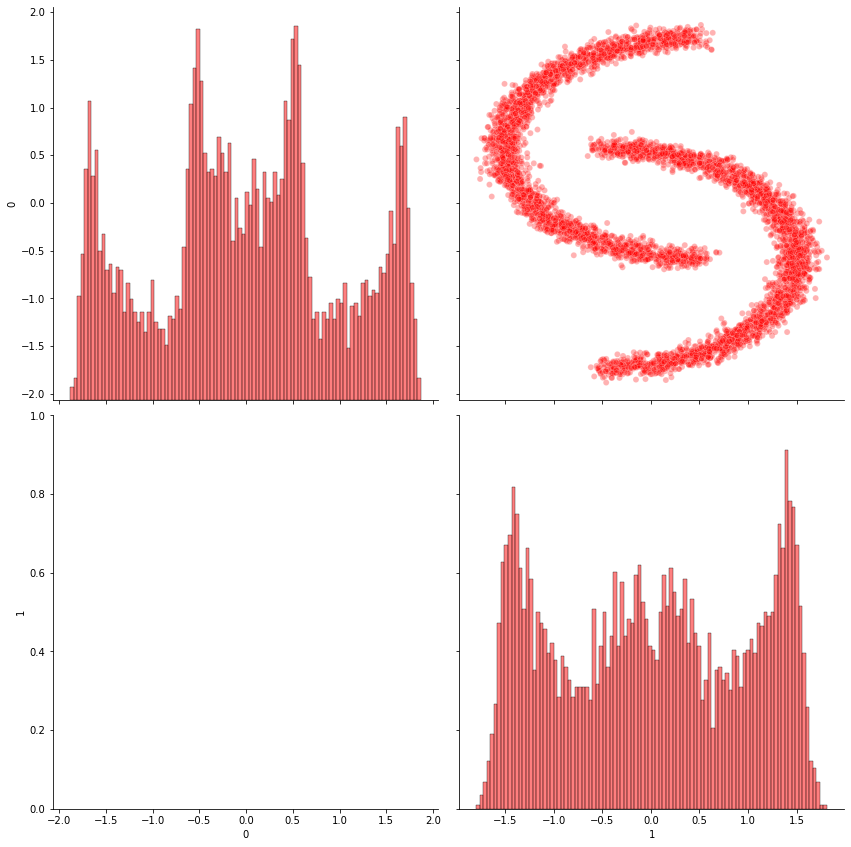

In [3]:
example =  "Moons"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [4]:
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/5)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs,batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

KeyboardInterrupt: 

In [ ]:
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/5)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[DIFDensityEstimatorLayer,2],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvp_dif = MixedModelDensityEstimator(target_samples,structure)
realnvp_dif.train(epochs, batch_size, visual = True)
realnvp_dif.model_visual(num_samples=int(num_samples/5), flow = True)

In [ ]:
import matplotlib.pyplot as plt

delta = 300
grid = torch.cartesian_prod(torch.linspace(torch.min(target_samples[:, 0]).item(), torch.max(target_samples[:, 0]).item(), delta),torch.linspace(torch.min(target_samples[:, 1]).item(), torch.max(target_samples[:, 1]).item(), delta))
grid = torch.cat((grid, torch.zeros(grid.shape[0],p- 2)), dim=-1)
density_real_nvp = torch.exp(realnvp.log_density(grid.to(realnvp.device))).reshape(delta, delta).T.cpu().detach()
density_real_nvp_dif = torch.exp(realnvprealnvp_diflog_density(grid.to(realnvp_dif.device))).reshape(delta, delta).T.cpu().detach()
x_range = torch.linspace(torch.min(target_samples[:, 0]).item(), torch.max(target_samples[:, 0]).item(), delta)
y_range = torch.linspace(torch.min(target_samples[:, 1]).item(), torch.max(target_samples[:, 1]).item(), delta)
plt.pcolormesh(x_range, y_range, density_real_nvp, cmap = blue_cmap)

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(target_samples[:10000,0],target_samples[:10000,1], color = 'red')
ax2 = fig.add_subplot(1,3,2)
samples_real_nvp = realnvp.sample_model(20000).detach().cpu()
ax2.plt.pcolormesh(x_range, y_range, density_real_nvp, cmap = blue_cmap)
ax3 = fig.add_subplot(1,3,3)
samples_real_nvp_dif = realnvp_dif.sample_model(20000).detach().cpu()
ax3.scatter(samples_real_nvp_dif[:,0],samples_real_nvp_dif[:,1], color = 'blue')